In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torchvision
import torchvision.transforms as transforms
#Downloading CIFAR10 Dataset
batch_size = 128 #Batch size should always be in mutliple of 2 for better Training
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torch.nn as nn
#torchsummary gives fine visualization of your model network 
from torchsummary import summary

In [0]:
#Using inbuilt Colab GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#Using tanh non-linear activation
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
import torch.optim as optim
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/50 ,Test acc: 38.43, Train acc: 38.32
Epoch: 1/50 ,Test acc: 43.33, Train acc: 43.71
Epoch: 2/50 ,Test acc: 47.43, Train acc: 47.35
Epoch: 3/50 ,Test acc: 48.98, Train acc: 50.02
Epoch: 4/50 ,Test acc: 51.24, Train acc: 53.20
Epoch: 5/50 ,Test acc: 51.68, Train acc: 54.23
Epoch: 6/50 ,Test acc: 52.75, Train acc: 56.42
Epoch: 7/50 ,Test acc: 53.44, Train acc: 57.84
Epoch: 8/50 ,Test acc: 53.93, Train acc: 58.64
Epoch: 9/50 ,Test acc: 55.08, Train acc: 60.32
Epoch: 10/50 ,Test acc: 55.37, Train acc: 61.18
Epoch: 11/50 ,Test acc: 54.82, Train acc: 61.85
Epoch: 12/50 ,Test acc: 55.13, Train acc: 62.64
Epoch: 13/50 ,Test acc: 55.06, Train acc: 63.57
Epoch: 14/50 ,Test acc: 55.36, Train acc: 64.40
Epoch: 15/50 ,Test acc: 55.44, Train acc: 65.06
Epoch: 16/50 ,Test acc: 55.11, Train acc: 65.53
Epoch: 17/50 ,Test acc: 55.44, Train acc: 66.34
Epoch: 18/50 ,Test acc: 55.96, Train acc: 67.26
Epoch: 19/50 ,Test acc: 55.89, Train acc: 67.97
Epoch: 20/50 ,Test acc: 55.74, Train acc: 68.54
Ep

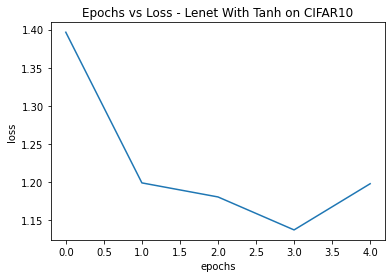

CPU times: user 15min 15s, sys: 4.5 s, total: 15min 20s
Wall time: 15min 21s


In [0]:
%%time
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d ,Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs vs Loss - Lenet With Tanh on CIFAR10")
plt.show()


In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 53.42, Train acc: 82.87


## Using ReLU activation function
We can clearly see model is overfitting the data so we use another NON_LINEAR Activation function "ReLU"

In [0]:
#Using ReLU non-linear activation
class LeNet_ReLU(nn.Module):
    def __init__(self): 
        super(LeNet_ReLU, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.ReLU(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.ReLU(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
net = LeNet_ReLU().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/50, Test acc: 39.81, Train acc: 39.36
Epoch: 1/50, Test acc: 44.95, Train acc: 44.83
Epoch: 2/50, Test acc: 48.23, Train acc: 48.11
Epoch: 3/50, Test acc: 49.19, Train acc: 50.23
Epoch: 4/50, Test acc: 51.92, Train acc: 53.15
Epoch: 5/50, Test acc: 52.84, Train acc: 54.32
Epoch: 6/50, Test acc: 54.22, Train acc: 55.79
Epoch: 7/50, Test acc: 53.12, Train acc: 55.89
Epoch: 8/50, Test acc: 55.14, Train acc: 58.38
Epoch: 9/50, Test acc: 55.30, Train acc: 58.78
Epoch: 10/50, Test acc: 56.74, Train acc: 60.16
Epoch: 11/50, Test acc: 56.56, Train acc: 60.68
Epoch: 12/50, Test acc: 56.60, Train acc: 61.68
Epoch: 13/50, Test acc: 57.13, Train acc: 61.68
Epoch: 14/50, Test acc: 57.53, Train acc: 62.12
Epoch: 15/50, Test acc: 57.33, Train acc: 63.20
Epoch: 16/50, Test acc: 57.51, Train acc: 63.72
Epoch: 17/50, Test acc: 58.02, Train acc: 64.91
Epoch: 18/50, Test acc: 57.52, Train acc: 64.69
Epoch: 19/50, Test acc: 58.91, Train acc: 65.51
Epoch: 20/50, Test acc: 58.63, Train acc: 66.53
Ep

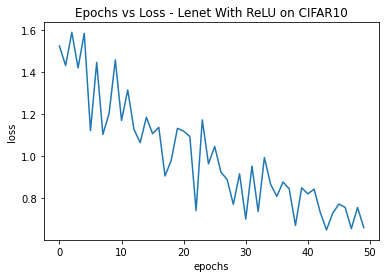

CPU times: user 14min 52s, sys: 4.37 s, total: 14min 56s
Wall time: 14min 58s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Epochs vs Loss - Lenet With ReLU on CIFAR10")
plt.show()

In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 59.44, Train acc: 76.91


## Adding L2 Regularization
- We can see that after changing Activation Function we can see improvement in model but still it is overfitting the data, so we will apply L2 regularization using weight_decay in optim.

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()

#weight_decay = L2
optimizer_l2 = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)

#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Epoch: 0/50, Test acc: 29.18, Train acc: 28.70
Epoch: 1/50, Test acc: 31.99, Train acc: 31.69
Epoch: 2/50, Test acc: 33.38, Train acc: 34.02
Epoch: 3/50, Test acc: 35.33, Train acc: 35.72
Epoch: 4/50, Test acc: 37.66, Train acc: 37.31
Epoch: 5/50, Test acc: 38.13, Train acc: 38.32
Epoch: 6/50, Test acc: 39.60, Train acc: 39.32
Epoch: 7/50, Test acc: 40.15, Train acc: 39.83
Epoch: 8/50, Test acc: 41.03, Train acc: 40.78
Epoch: 9/50, Test acc: 41.41, Train acc: 41.67
Epoch: 10/50, Test acc: 42.37, Train acc: 42.39
Epoch: 11/50, Test acc: 42.74, Train acc: 43.23
Epoch: 12/50, Test acc: 43.13, Train acc: 43.53
Epoch: 13/50, Test acc: 43.95, Train acc: 44.22
Epoch: 14/50, Test acc: 44.44, Train acc: 44.82
Epoch: 15/50, Test acc: 45.08, Train acc: 45.52
Epoch: 16/50, Test acc: 45.42, Train acc: 45.51
Epoch: 17/50, Test acc: 46.09, Train acc: 46.20
Epoch: 18/50, Test acc: 46.38, Train acc: 46.77
Epoch: 19/50, Test acc: 46.80, Train acc: 46.89
Epoch: 20/50, Test acc: 47.27, Train acc: 47.28
Ep

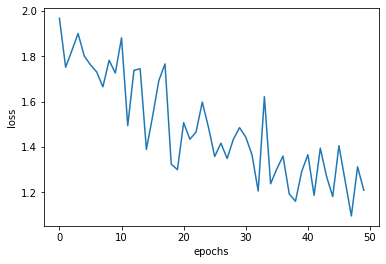

CPU times: user 15min 23s, sys: 4.5 s, total: 15min 28s
Wall time: 15min 29s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 50

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):
      
        # get the inputs
        inputs, labels = data
        
        #move inputs to gpu
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer_l2.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer_l2.step()
        
        #store loss value for loss plot
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("")
plt.show()    

In [0]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 52.69, Train acc: 55.32


## Conlusion
We we able to remove overfitting in our Model but Accuracy was low as it was a basic Neural network. For Higher accuracy we can Use VGG16,ResNet18,MobileNetV2 and much more.